## CMTH642 - Data Analytics: Advanced Methods  
### Assignment 1


*****
Assignment 1 is worth 15% of the final grade. Submit the ipynb file and the generated pdf output file. Failing to submit both files will be subject to a mark deduction.
*****



### Preparation

The dataset is related to Forest Fires. For more info: https://archive.ics.uci.edu/ml/datasets/forest+fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Q1.

Read the csv file from the this URL https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv. Save it to a data frame called Forest. Check the first five records. (10 points)
[Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)


In [2]:
Forest = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
Forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Q2.
How many observations are there in the dataset? How many observations are there with both a significant fire (burned area > 0) and rain? (10 points) [Relevent API1](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.shape.html) , [Relevant Pandas API 2](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html#)

In [3]:
#Number of observations in the dataset
num_rows = Forest.shape[0]
print('There are a total of', num_rows, 'observations.')

#Filtering for observations that meet criteria
criteria = (Forest['area'] > 0) & (Forest['rain'] > 0)
filtered_df = Forest[criteria]

#Number of filtered observations
num_filtered_observations = filtered_df.shape[0]
print('There are', num_filtered_observations, 'observations with both a significant fire (burned area >0) and rain (rain > 0).')

There are a total of 517 observations.
There are 2 observations with both a significant fire (burned area >0) and rain (rain > 0).


# Q3.
Show the columns month, day, area of all the observations with a significant fire (burned area >0 ). (10 points) [Relevant Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [4]:
#Filter for columns
month_day_area = Forest[["month","day","area"]]

#Filter for observations with a significant fire
sig_fire = month_day_area["area"] > 0
month_day_area.loc[sig_fire]

,month,day,area
138,jul,tue,0.36
139,sep,tue,0.43
140,sep,mon,0.47
141,aug,wed,0.55
142,aug,fri,0.61
...,...,...,...
509,aug,fri,2.17
510,aug,fri,0.43
512,aug,sun,6.44
513,aug,sun,54.29


# Q4.
How large are the five largest fires (i.e. having largest area)? (10 points) [Relevant API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [6]:
#Sort df by area
sorted_area = Forest.sort_values(by = 'area', ascending = False)

#Display area of the five largest fires
sorted_area['area'].head()

238    1090.84
415     746.28
479     278.53
237     212.88
236     200.94
Name: area, dtype: float64

# Q5.
For the records you obtained from the previous question, what are the corresponding month, temp, RH, wind, rain, area? (10 points)

In [7]:
sorted_area[['month','temp', 'RH', 'wind', 'rain', 'area']].head()

,month,temp,RH,wind,rain,area
238,sep,25.1,27,4.0,0.0,1090.84
415,aug,27.5,27,4.9,0.0,746.28
479,jul,22.6,57,4.9,0.0,278.53
237,sep,18.8,40,2.2,0.0,212.88
236,sep,18.2,46,1.8,0.0,200.94


# Q6.
For the whole dataset, reorder factor levels of month to be from Jan to Dec. (10 points)

In [8]:
Forest['month'] = pd.Categorical(Forest['month'], categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered=True)
Forest = Forest.sort_values('month')
Forest

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,dec,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19
281,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77
273,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77


# Q7.
Add one column to the data indicating whether a fire occurred for each observation ('TRUE' for area>0 and 'FALSE' for area==0). (10 points)

In [9]:
Forest['fire occured'] = Forest['area'] > 0
Forest

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire occured
104,2,4,jan,sat,82.1,3.7,9.3,2.9,5.3,78,3.1,0.0,0.00,False
379,4,5,jan,sun,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,False
96,3,4,feb,sat,83.9,8.0,30.2,2.6,12.7,48,1.8,0.0,0.00,False
59,2,2,feb,fri,86.6,13.2,43.0,5.3,12.3,51,0.9,0.0,0.00,False
202,7,4,feb,sun,83.9,8.7,32.1,2.1,8.8,68,2.2,0.0,13.05,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,8,6,dec,wed,84.0,27.8,354.6,5.3,5.1,61,8.0,0.0,11.19,True
281,6,5,dec,tue,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,True
273,4,6,dec,sun,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98,True
279,4,4,dec,mon,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77,True


# Q8.
What is the mean area/wind/temp/RH per month? (10 points)

In [10]:
Forest.groupby('month')[['area', 'wind', 'temp', 'RH']].mean()

,area,wind,temp,RH
month,,,,
jan,0.000000,2.000000,5.250000,89.000000
feb,6.275000,3.755000,9.635000,55.700000
mar,4.356667,4.968519,13.083333,40.000000
apr,8.891111,4.666667,12.044444,46.888889
may,19.240000,4.450000,14.650000,67.000000
jun,5.841176,4.135294,20.494118,45.117647
jul,14.369687,3.734375,22.109375,45.125000
aug,12.489076,4.086413,21.631522,45.489130
sep,17.942616,3.557558,19.612209,42.843023


# Q9.
How many observations are there in each month? Visualize by using a barplot in descending order. (10 points) [Relevant API 1](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) [Relevant API  2](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

Number of observations in each month:
 aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

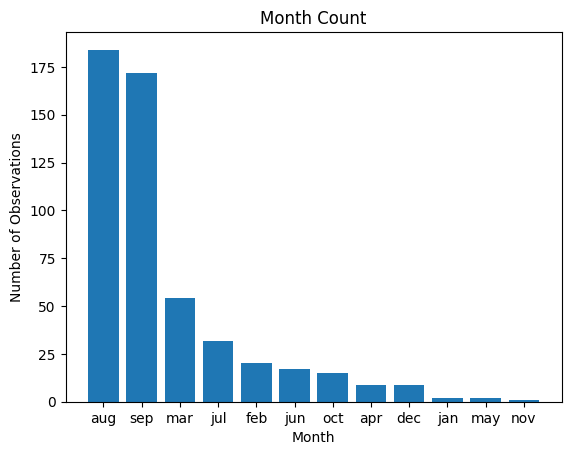

In [26]:
#Count the number of observations in each month
month_count = Forest['month'].value_counts()

#Sort dscending order
month_count = month_count.sort_values(ascending = False)
print('Number of observations in each month:\n', month_count)

#Extract month and counts for plotting
months = month_count.index
counts = month_count.values

#Create a bar plot
plt.bar(months, counts)
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.title('Month Count')
plt.show

# Q10.
How many observations are there with burned area greater than zero in each month? Visualize by using a barplot in descending order. (10 points)

Number of observations in each month for burned area greater than zero:
 aug    99
sep    97
mar    19
jul    18
feb    10
dec     9
jun     8
oct     5
apr     4
may     1
jan     0
nov     0
Name: month, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

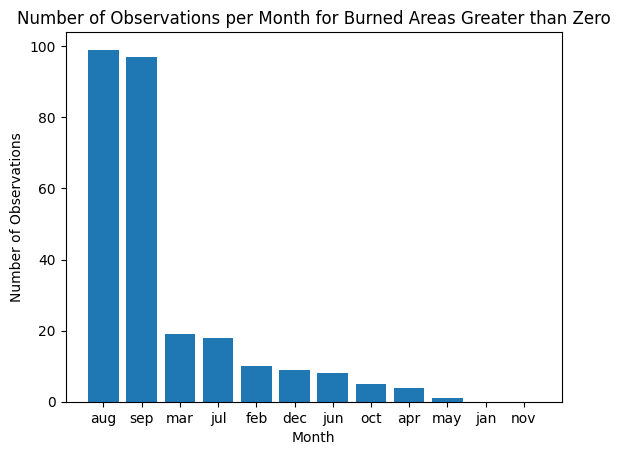

In [25]:
#Filter for observations with area > 0
number_area_per_month = Forest[Forest['area'] > 0]

#Count number observations by month
number_area_per_month = number_area_per_month['month'].value_counts()
print('Number of observations in each month for burned area greater than zero:\n', number_area_per_month)

#Extract month and counts for plotting
month = number_area_per_month.index
count = number_area_per_month.values

#Create a bar plot
plt.bar(month, count)
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.title('Number of Observations per Month for Burned Areas Greater than Zero')
plt.show

This is the end of Assignment 1

Ceni Babaoglu, PhD